In [ ]:
import scipy
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import linear_model 
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell
import sys
import time
#import savReaderWriter as sav
#import the evaluatation metric
from sklearn.svm import LinearSVC
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.metrics import mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
#from sklearn.metrics import balanced_accuracy_score
#pandas library for reading data
import pandas as pd
#numpy library for computation with matrices and arrays
import numpy as np
#matplotlib library for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#command for displaying visualizations within the notebook
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score,log_loss

import seaborn as sns
#from tpot import TPOTClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
#from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore') # to supress warnings
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
#Import libraries:
from sklearn.preprocessing import Imputer
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#### Importing data set

In [ ]:
Data=pd.read_csv("Dataset11.csv")
Data.head()

,Year of audit,Year of Registration,Country Name,Current Tax Center Name,Province Name,Dstrict Name,Sector Name,Scale desc...9,Tax Payer Type Desc,ISIC sector,Mobile Phone Num,Registration Status,Fraud Status,Scale,sector,Place,Level of Income,Business origin,Department,TAXTYPE,Time of Business,TOTOLAMOUNT,Provinces,Registration Status1,Scale1,Place1,Sector1,Level of Income1,Description,ORIGIN,TAXTYPE1,Department1,STATUS
0,2016,2008,RWANDA,GASABO TC,KIGALI CITY,GASABO,NaN,SMALL,INDIVIDUAL,OTHERS,0.000000e+00,No,No,Small,OTHERS,Urban,Small Income,National,Domestic,VAT,8,0,1,0,3,1,4,3,1,1,1,1,0
1,2019,2011,RWANDA,GASABO TC,KIGALI CITY,GASABO,NDERA,SMALL,NON INDIVIDUAL,OTHERS,2.510000e+11,No,No,Small,OTHERS,Urban,Small Income,National,Domestic,OTHERS,8,0,1,0,3,1,4,3,2,1,8,1,0
2,2018,2014,RWANDA,MUSANZE TC,NORTH,MUSANZE,MUHOZA,SMALL,NON INDIVIDUAL,OTHERS,2.510000e+11,No,No,Small,OTHERS,District Cities,Small Income,National,Domestic,VAT,4,512542,3,0,3,2,4,3,2,1,1,1,0
3,2014,2010,RWANDA,NYARUGENGE TC,KIGALI CITY,NYARUGENGE,NaN,SMALL,INDIVIDUAL,OTHERS,7.822016e+08,No,No,Small,OTHERS,Urban,Small Income,National,Domestic,OTHERS,4,0,1,0,3,1,4,3,1,1,8,1,0
4,2018,2011,RWANDA,NYARUGENGE TC,KIGALI CITY,NYARUGENGE,NYAMIRAMBO,SMALL,INDIVIDUAL,OTHERS,NaN,No,No,Small,OTHERS,Urban,Small Income,National,Domestic,PITVAT,7,932053752,1,0,3,1,4,3,1,1,7,1,0


#### Combining traaining data set for EDA

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28502 entries, 0 to 28501
Data columns (total 33 columns):
Year of audit              28502 non-null int64
Year of Registration       28502 non-null int64
Country Name               28502 non-null object
Current Tax Center Name    28502 non-null object
Province Name              28502 non-null object
Dstrict Name               28137 non-null object
Sector Name                26912 non-null object
Scale desc...9             28502 non-null object
Tax Payer Type Desc        28502 non-null object
ISIC sector                28298 non-null object
Mobile Phone Num           28116 non-null float64
Registration Status        28502 non-null object
Fraud Status               28502 non-null object
Scale                      28502 non-null object
sector                     28502 non-null object
Place                      28502 non-null object
Level of Income            28502 non-null object
Business origin            28502 non-null object
Department

In [ ]:
Data['TOTOLAMOUNT'].value_counts()


0           1134
5.00E+05     163
5.00E+06      94
250000        32
1.00E+07      28
            ... 
1786572        1
90589          1
32917          1
46626          1
125265         1
Name: TOTOLAMOUNT, Length: 26170, dtype: int64

In [ ]:
Data.isnull().sum()

Year of audit                 0
Year of Registration          0
Country Name                  0
Current Tax Center Name       0
Province Name                 0
Dstrict Name                365
Sector Name                1590
Scale desc...9                0
Tax Payer Type Desc           0
ISIC sector                 204
Mobile Phone Num            386
Registration Status           0
Fraud Status                  0
Scale                         0
sector                        0
Place                         0
Level of Income               0
Business origin               0
Department                    0
TAXTYPE                       0
Time of Business              0
TOTOLAMOUNT                 169
Provinces                     0
Registration Status1          0
Scale1                        0
Place1                        0
Sector1                       0
Level of Income1              0
Description                   0
ORIGIN                        0
TAXTYPE1                      0
Departme

In [ ]:
Data['TOTOLAMOUNT']=Data['TOTOLAMOUNT'].fillna(Data['TOTOLAMOUNT'].mode()[0])

In [ ]:
Data['TOTOLAMOUNT'].value_counts()

0           1303
5.00E+05     163
5.00E+06      94
250000        32
1.00E+07      28
            ... 
1786572        1
90589          1
32917          1
46626          1
125265         1
Name: TOTOLAMOUNT, Length: 26170, dtype: int64

#### Basic EDA with pandas Profile Report

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(Data)

Number of variables,33
Number of observations,28502
Total Missing (%),0.3%
Total size in memory,7.2 MiB
Average record size in memory,264.0 B
Numeric,10
Categorical,18
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [ ]:
#df['good_bad_flag'].mean()

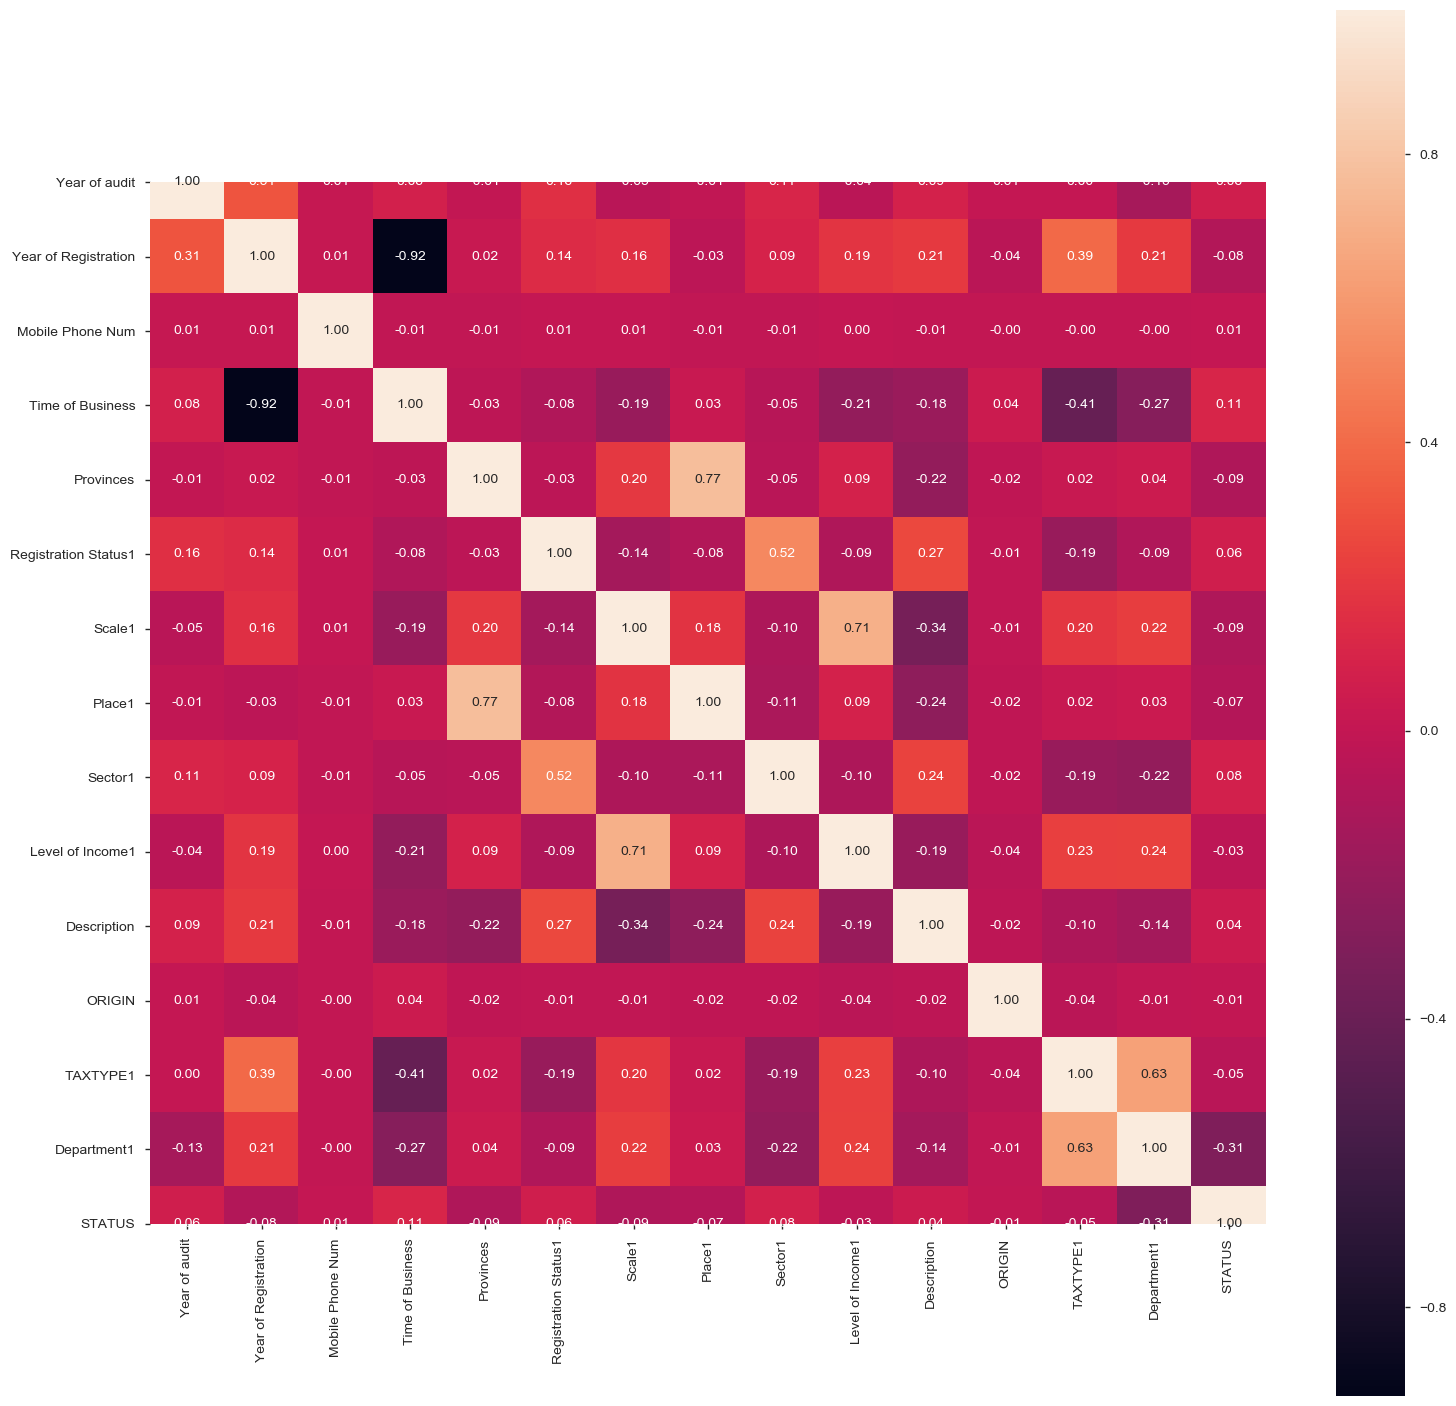

In [ ]:
cor = Data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

In [ ]:
# function to make a bar plot
def plot0(col1, col2, tittle, xticks, Data):
    dt = Data.groupby(col1).agg([np.mean])*100.0
    dt = dt[col2].reset_index()
    f, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=col1, y="mean", data=dt)
    ax.set(xlabel="", ylabel="Registration Status %")
    ax.set_title(label=tittle, fontsize=15)
    ax.set_xticklabels(xticks, fontsize=11)

In [ ]:
loan_crosstab = pd.crosstab(Data['Registration Status'], Data['Fraud Status'], margins=True, normalize=False)
new_index = {}
new_columns = {}
loan_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
loan_crosstab/loan_crosstab.loc['All']

Fraud Status,No,Yes,All
Registration Status,,,
No,0.177476,0.125496,0.162304
Yes,0.822524,0.874504,0.837696
All,1.000000,1.000000,1.000000


In [ ]:
loan_crosstab = pd.crosstab(Data['Registration Status'], Data['Level of Income'], margins=True, normalize=False)
new_index = {}
new_columns = {}
loan_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
loan_crosstab/loan_crosstab.loc['All']

Level of Income,High Income,Moderate Income,Small Income,All
Registration Status,,,,
No,0.0,0.013857,0.170277,0.162304
Yes,1.0,0.986143,0.829723,0.837696
All,1.0,1.000000,1.000000,1.000000


In [ ]:
#h/w cross_tab the remaining

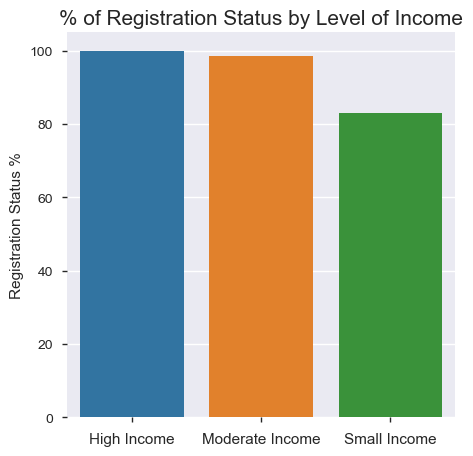

In [ ]:
#Bar Chart
col1 = "Level of Income"
col2 = "Registration Status1"
tittle = "% of Registration Status by Level of Income"
xticks = ['High Income',"Moderate Income",'Small Income'] 
plot0(col1, col2, tittle, xticks, Data)

In [ ]:
loan_crosstab = pd.crosstab(Data['Registration Status'], Data['sector'], margins=True, normalize=False)
new_index = {}
new_columns = {}
loan_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
loan_crosstab/loan_crosstab.loc['All']

sector,Agriculture,Industry,OTHERS,Services,All
Registration Status,,,,,
No,0.036474,0.573398,0.3625,0.037223,0.162304
Yes,0.963526,0.426602,0.6375,0.962777,0.837696
All,1.000000,1.000000,1.0000,1.000000,1.000000


### Checking Correlation

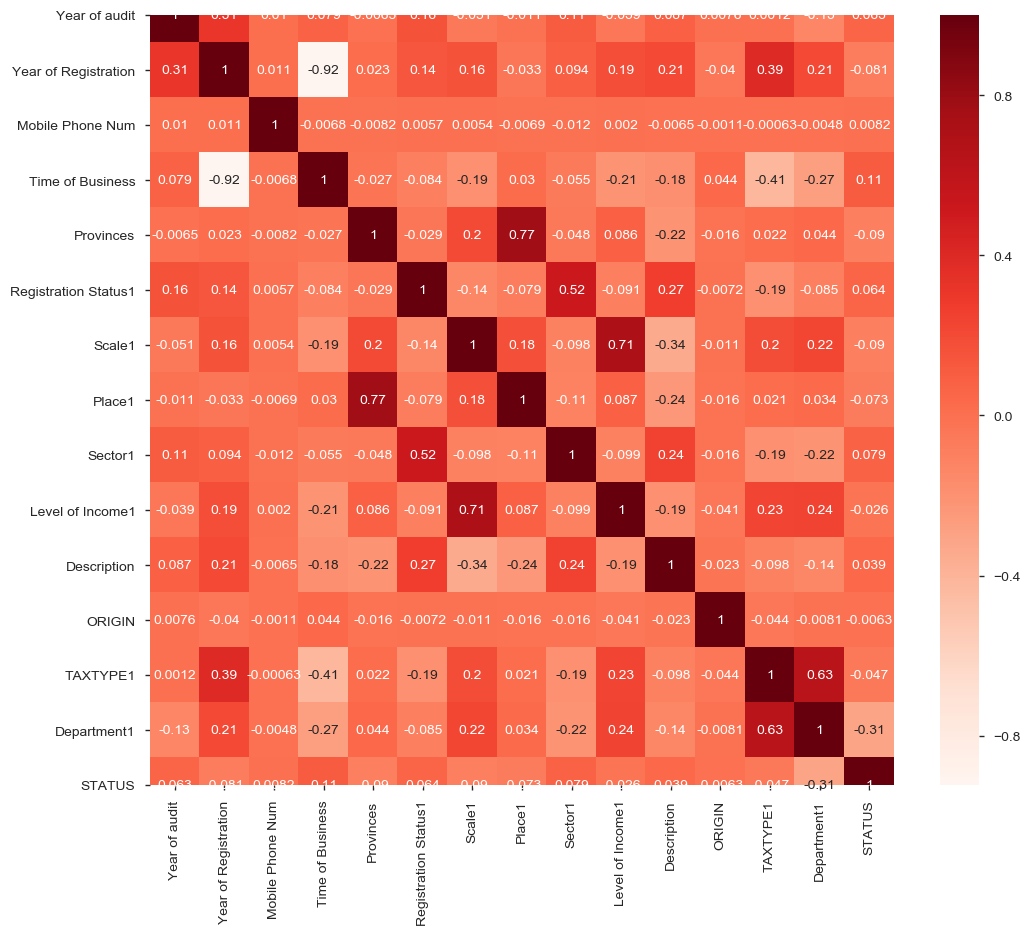

In [ ]:
plt.figure(figsize=(12,10))
cor = Data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Registration Status1"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.06]
relevant_features

Year of audit           0.162808
Year of Registration    0.142394
Time of Business        0.083504
Registration Status1    1.000000
Scale1                  0.136719
Place1                  0.079406
Sector1                 0.519533
Level of Income1        0.090706
Description             0.265774
TAXTYPE1                0.191915
Department1             0.085166
STATUS                  0.064089
Name: Registration Status1, dtype: float64

In [ ]:
Data['Place'].value_counts()

Urban              20613
District Cities     4047
Rural               3842
Name: Place, dtype: int64

In [ ]:
col=['Registration Status1','Scale1','Place1','Sector1','Level of Income1','Description','TAXTYPE1','Department1','STATUS']

In [ ]:
df2=Data[col]
df2.head()

,Registration Status1,Scale1,Place1,Sector1,Level of Income1,Description,TAXTYPE1,Department1,STATUS
0,0,3,1,4,3,1,1,1,0
1,0,3,1,4,3,2,8,1,0
2,0,3,2,4,3,2,1,1,0
3,0,3,1,4,3,1,8,1,0
4,0,3,1,4,3,1,7,1,0


In [ ]:

df2.shape

(28502, 9)

### Setting Dummy variables 

In [ ]:
X=df2.drop('Registration Status1',axis=1)


In [ ]:
x=pd.get_dummies(X)
y=df2['Registration Status1']

In [ ]:
x.shape

(28502, 8)

### train and test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=300)

In [ ]:
X.shape

(28502, 8)

### train test and validation split
We'll generate a train/validation/test three way split.

In [ ]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15
kfold = 5

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)
StratifiedKFold(n_splits=kfold, random_state=42)
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

### Models Training
We'll train a binary classifier to predict business success using regitration status, and evaluate the model using some common evaluation metrics.


In [ ]:
lrr = LogisticRegression(solver='liblinear')
lrr.fit(x_train, y_train)
y3_pred = lrr.predict(x_val)
mean_squared_error(y_val,y3_pred)

0.1270175438596491

In [ ]:
accuracy_score(y_val,y3_pred)

0.8729824561403509

In [ ]:
print(confusion_matrix(y_val,y3_pred))
print(roc_curve(y_val,y3_pred))
#roc_curve

[[ 165   80]
 [ 101 1079]]
(array([0.        , 0.32653061, 1.        ]), array([0.        , 0.91440678, 1.        ]), array([2, 1, 0], dtype=int64))


In [ ]:
#H/W Do for test
print(f1_score(y_val,y3_pred))
#roc_curve

0.9226165027789653


In [ ]:
print(precision_score(y_val,y3_pred))
print(recall_score(y_val,y3_pred))

0.9309749784296808
0.9144067796610169


In [ ]:
lrr = LogisticRegression(solver='liblinear')
lrr.fit(x_train, y_train)
y4_pred = lrr.predict(x_test)
mean_squared_error(y_test,y4_pred)

0.11009817671809256

In [ ]:
accuracy_score(y_test,y4_pred)

0.8899018232819075

In [ ]:
f1_score(y_test,y4_pred)

0.9346650020807323

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y4_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y4_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y4_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 146   73]
 [  84 1123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       219
           1       0.94      0.93      0.93      1207

    accuracy                           0.89      1426
   macro avg       0.79      0.80      0.79      1426
weighted avg       0.89      0.89      0.89      1426

Accuracy: 0.8899018232819075


In [ ]:
#https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_random_forest.htm

In [ ]:
# rf_predictions =dt.predict(x_test)
# # Probabilities for each class
# rf_probs = dt.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
#roc_value = roc_auc_score(x_test, rf_probs)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
f1_score(y_test,pred_dt)

0.9456842105263157

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred_dt)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred_dt)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred_dt)
print("Accuracy:",result2)

Confusion Matrix:
[[ 174   45]
 [  84 1123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

Accuracy: 0.9095371669004207


In [ ]:
accuracy_score(y_test,pred_dt)

0.9095371669004207

## Ensambling ML classifier

In [ ]:
#h/w attempt DT,RF

In [ ]:
clfs = {
'LogisticRegression' : LogisticRegression(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'Gradient Boosting': GradientBoostingClassifier(),
'XGBoost': XGBClassifier()
}

In [ ]:
 #code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score','Accuracy','log_loss','Brier'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_pred1 = clf.predict_proba(x_test)[:, 1]
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': metrics.recall_score(y_test, y_pred,average='macro'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='macro'),
                     'log_loss':metrics.log_loss(y_test, y_pred1),
                     'Brier': metrics.brier_score_loss(y_test, y_pred1),
                     'ROC AUC':metrics.roc_auc_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                     
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy,log_loss,Brier,ROC AUC
0,LogisticRegression,0.786873,0.798536,0.792500,0.889902,0.269914,0.079970,0.798536
1,RandomForest,0.819274,0.862878,0.838610,0.910238,0.284836,0.063821,0.862878
2,DecisionTreeClassifier,0.817946,0.862463,0.837622,0.909537,0.331554,0.064556,0.862463
3,Gradient Boosting,0.819274,0.862878,0.838610,0.910238,0.221681,0.063721,0.862878
4,XGBoost,0.817946,0.862463,0.837622,0.909537,0.221189,0.063654,0.862463


In [ ]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print( 'Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Yes', 'No'],
                             columns=['Predicted yes', 'Predicted no'])
    print( conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    #prob = md.predict_proba(x_test)[:,1]
    print( ' ' )
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print( 'Accuracy on Test set: ', md.score(x_test, y_test))
    print( ' ')
    print(classification_report(y_test, pred))
    print( ' ')
    print('Confusion Matrix',confmat(pred, y_test))
    
    #roc(prob, y_test)
    return md

In [ ]:
# feature selection with the best model from grid search
rf=RandomForestClassifier(n_estimators=1000)
model_gb = model(rf, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9129858485049316
Accuracy on Test set:  0.908835904628331
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1123            84
No              46           173
Confusion Matrix None


In [ ]:
XGB=XGBClassifier(max_depth=3,
    learning_rate=0.3,
    n_estimators=500,
    n_jobs=1,
    gamma=0,
    min_child_weight=3,
    missing=None,) 
model_xgb = model(XGB, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9122451366418464
Accuracy on Test set:  0.9102384291725105
 
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1125            82
No              46           173
Confusion Matrix None


In [ ]:
XGB=XGBClassifier() 
model_xgb = model(XGB, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9110755915948696
Accuracy on Test set:  0.9095371669004207
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1123            84
No              45           174
Confusion Matrix None


In [ ]:
DT=DecisionTreeClassifier()
model_DT = model(DT, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9129858485049316
Accuracy on Test set:  0.9095371669004207
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1123            84
No              45           174
Confusion Matrix None


In [ ]:
# # Use gridsearch to fine tune the parameters
# gb = GradientBoostingClassifier()
# gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}
# gridsearch(gb, gb_params,x_train, x_test, y_train, y_test,5)

In [ ]:
# feature selection with the best model from grid search
gb = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 7,n_estimators=100, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9127909243304355
Accuracy on Test set:  0.908835904628331
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1123            84
No              46           173
Confusion Matrix None


In [ ]:
# # Use gridsearch to fine tune the parameters
# xgb = XGBClassifier()
# xgb_params = {'n_estimators':[100,200,300],'learning_rate':[0.01,0.02,0.03,0.05], 'max_depth':[4,7],'min_child_weight':[0,2,4],'gamma':[0]}
# gridsearch(xgb, xgb_params,x_train, x_test, y_train, y_test,5)

In [ ]:
# feature selection with the best model from grid search
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=200,
 max_depth=7,
 min_child_weight=4,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
model_xgb = model(xgb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9124400608163424
Accuracy on Test set:  0.908835904628331
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.95      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1123            84
No              46           173
Confusion Matrix None


In [ ]:
# feature selection with the best model from grid search
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=4,
 min_child_weight=1,
 gamma=0.08,
 subsample=0.8,
 colsample_bytree=0.8
)
model_xgb = model(xgb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9125180304861409
Accuracy on Test set:  0.9081346423562412
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       219
           1       0.96      0.93      0.94      1207

    accuracy                           0.91      1426
   macro avg       0.82      0.86      0.84      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1122            85
No              46           173
Confusion Matrix None


In [ ]:
# feature selection with the best model from grid search
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=600,
 max_depth=4,
 min_child_weight=0,
 gamma=0.08,
 subsample=0.8,
 colsample_bytree=0.8
)
model_xgb = model(xgb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.9125570153210402
Accuracy on Test set:  0.9074333800841514
 
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       219
           1       0.96      0.93      0.94      1207

    accuracy                           0.91      1426
   macro avg       0.81      0.86      0.83      1426
weighted avg       0.92      0.91      0.91      1426

 
     Predicted yes  Predicted no
Yes           1121            86
No              46           173
Confusion Matrix None


In [ ]:
#attempt DT,SVM

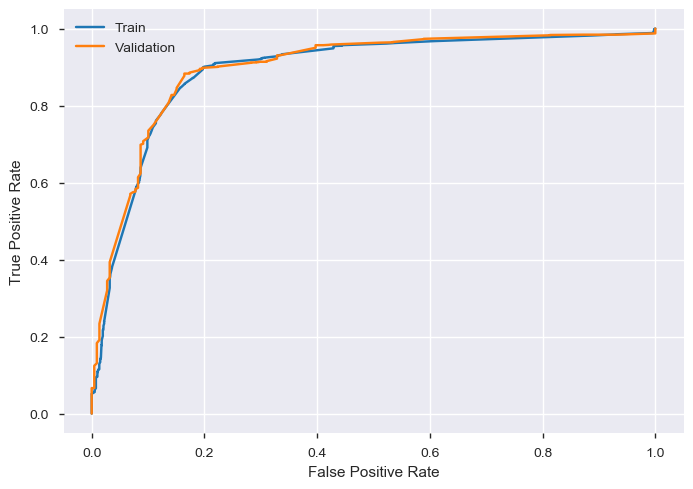

Area Under the Curve (AUC):  0.8972564908656884


In [ ]:
probas_train = lrr.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])

# Testing Set
probas_ = lrr.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr, tpr, label = 'Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Area Under the Curve (AUC): ', roc_auc)

Since AUC is 0.8967, it means there is 89.67% chance that model will be able to distinguish between positive class and negative class.

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 7, alpha = 10, n_estimators = 200)

Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains

In [ ]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [ ]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.264124


You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here you are using the Dmatrix object you created before

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.05,
                'max_depth': 7, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.488621,0.000138,0.488629,0.000109
1,0.476044,0.002103,0.476081,0.002471
2,0.465987,0.002402,0.466010,0.002967
3,0.454922,0.002475,0.454962,0.002635
4,0.444320,0.003893,0.444339,0.003464


Extract and print the final boosting round metric.

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.299324
Name: test-rmse-mean, dtype: float64


#### Visualize Boosting Trees and Feature Importance
Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
# #Plotting the first tree with the matplotlib library:
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

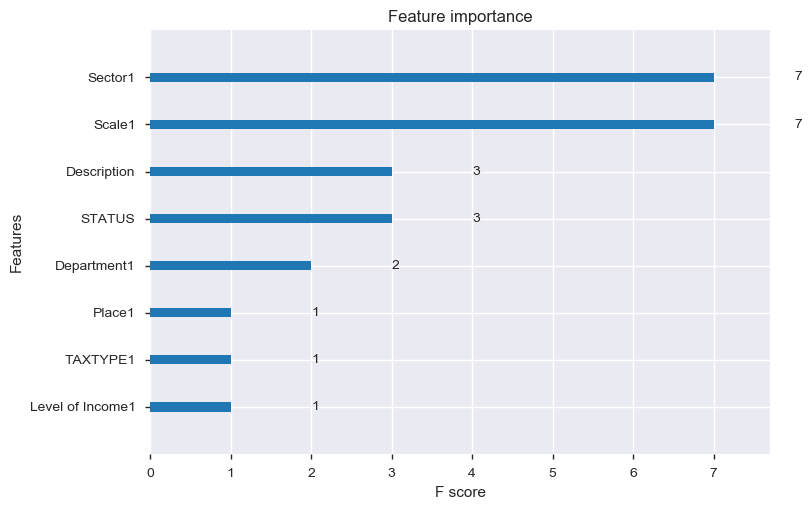

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Calibration
A great way of checking how a classifier's probability forecasting is performing on your dataset of interest is using a so-called calibration curve. The recipe for building a calibration curve is as follows:

The The calibration curve works by sorting the probabilities assigned to the records being predicted by the probability reported by the classifier. It then bins the values, and calculates two things.

The `fraction_of_positives` is the percentage of records in the chosen bin which *actually* belong to the dominant class. This is determined by looking at what values these points are actually assigned in $y$, and it is the emperical truth.
 
 The  `mean_predicted_value`, is the mean probability of these points belonging to the dominant class reported by the algorithm.
 
 A well-calibrated model has a calibration curve that hugs the straight line y=x.

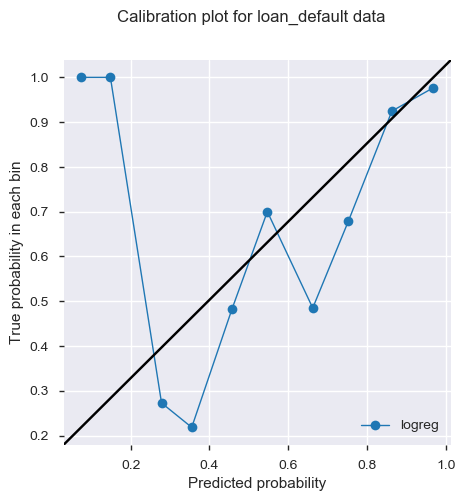

In [ ]:
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
lrr = LogisticRegression(solver='liblinear')
lrr.fit(x_train, y_train)
logreg_prediction = lrr.predict_proba(x_test)
logreg_y, logreg_x = calibration_curve(y_test, logreg_prediction[:,1], n_bins=10)

fig, ax = plt.subplots()
# only these two lines are calibration curves
#plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot(logreg_x,logreg_y,marker='o', linewidth=1, label='logreg')
#plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for loan_default data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

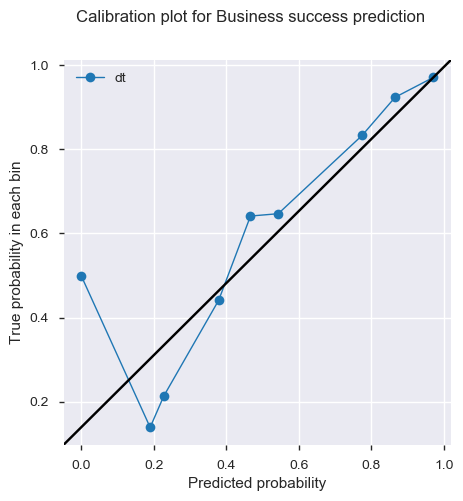

In [ ]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_prediction = dt.predict_proba(x_test)
dt_y, dt_x = calibration_curve(y_test, dt_prediction[:,1], n_bins=10)

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(dt_x, dt_y, marker='o', linewidth=1, label='dt')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Business success prediction')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

### Random Forest calibration

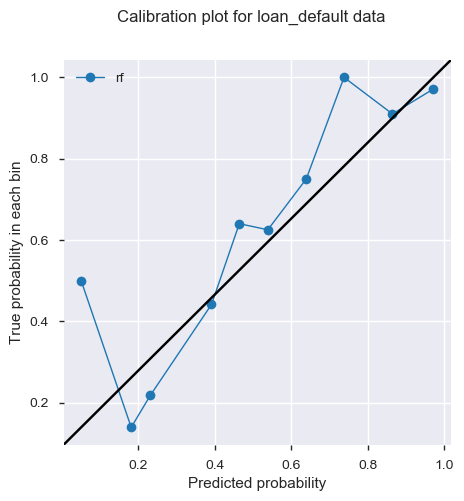

In [ ]:
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
rf_model = RandomForestClassifier(random_state=1234).fit(x_train, y_train)
rf_model.fit(x_train,y_train)
rf_prediction = rf_model.predict_proba(x_test)
rf_y, rf_x = calibration_curve(y_test, rf_prediction[:,1], n_bins=10)

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for loan_default data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

### Gradientboost Calibration

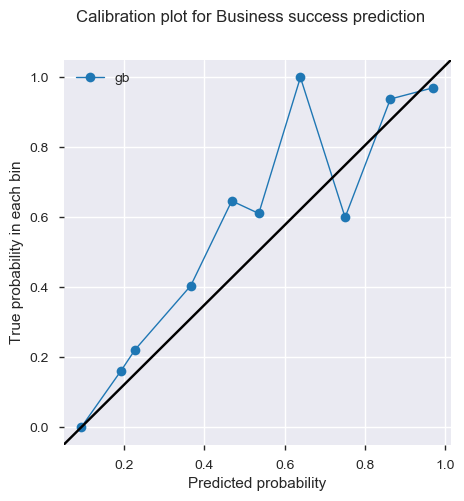

In [ ]:
gb = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 7,n_estimators=100, 
                                max_features = 0.9,min_samples_leaf = 5)
gb.fit(x_train,y_train)
gb_prediction = gb.predict_proba(x_test)
gb_y, gb_x = calibration_curve(y_test, gb_prediction[:,1], n_bins=10)
fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(gb_x, gb_y, marker='o', linewidth=1, label='gb')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Business success prediction')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

### xgboost Calibration

In [ ]:
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=600,
 max_depth=4,
 min_child_weight=0,
 gamma=0.08,
 subsample=0.8,
 colsample_bytree=0.8
)
xgb.fit(x_train,y_train)
xgb_prediction = xgb.predict_proba(x_test)
xgb_y, xgb_x = calibration_curve(y_test, xgb_prediction[:,1], n_bins=10)

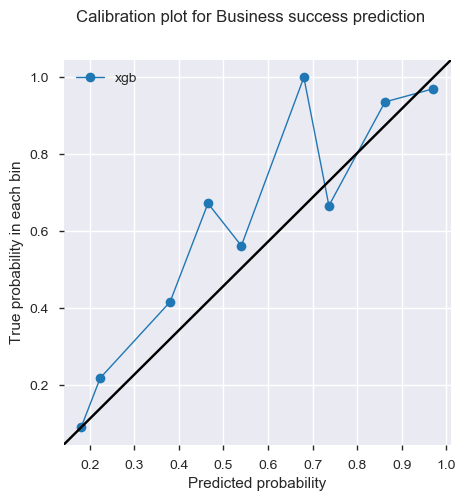

In [ ]:
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(xgb_x, xgb_y, marker='o', linewidth=1, label='xgb')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Business success prediction')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

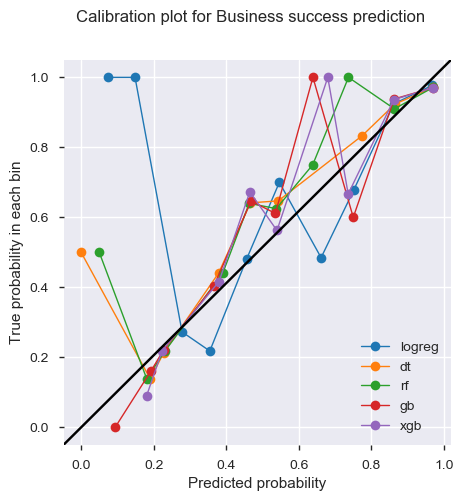

In [ ]:
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(logreg_x,logreg_y,marker='o', linewidth=1, label='logreg')
plt.plot(dt_x, dt_y, marker='o', linewidth=1, label='dt')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')
plt.plot(gb_x, gb_y, marker='o', linewidth=1, label='gb')
plt.plot(xgb_x, xgb_y, marker='o', linewidth=1, label='xgb')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Business success prediction')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

### Cross-validated version
Use 5-fold cross-validation instead, and take the average of all of my data to make the calibration plot.



In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1234)

# store probability predictions and true labels here
logreg_kfold_probability = []
rf_kfold_probability = []
kfold_true_label = []

In [ ]:
for train_index, validate_index in kf.split(df2):
    kfold_train, kfold_validate = df2.iloc[train_index], df2.iloc[validate_index]
    
    train_features = kfold_train[col]
    train_labels = kfold_train['Registration Status1']
    validate_features = kfold_validate[col]
    validate_labels = kfold_validate['Registration Status1']
    
    logreg_model = LogisticRegression().fit(X=train_features ,y=train_labels)
    rf_model = RandomForestClassifier().fit(X=train_features, y=train_labels)
    
    logreg_kfold_probability.append(logreg_model.predict_proba(validate_features)[:,1])
    rf_kfold_probability.append(rf_model.predict_proba(validate_features)[:,1])
    kfold_true_label.append(validate_labels)

### Concatenate the results and compute bins for calibration curves.

In [ ]:

logreg_kfold_probability_stacked = np.hstack(logreg_kfold_probability)
rf_kfold_probability_stacked = np.hstack(rf_kfold_probability)
kfold_true_label_stacked = np.hstack(kfold_true_label)
                                     
logreg_y, logreg_x = calibration_curve(kfold_true_label_stacked, logreg_kfold_probability_stacked, n_bins=10)
rf_y, rf_x = calibration_curve(kfold_true_label_stacked, rf_kfold_probability_stacked, n_bins=10)

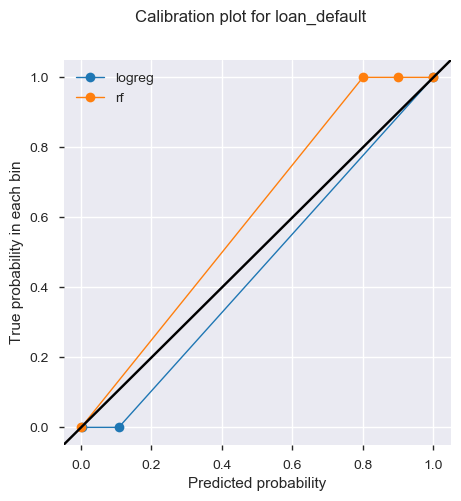

In [ ]:

# calibration curves
fig, ax = plt.subplots()
plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label='logreg')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for loan_default')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show() # it's not rendered correctly on GitHub, check blog post for actual pic

### callibration further exercises

Logistic:
	Brier: 0.080
	Precision: 0.939
	Recall: 0.930
	F1: 0.935

Naive Bayes:
	Brier: 0.226
	Precision: 0.964
	Recall: 0.616
	F1: 0.751

Naive Bayes + Isotonic:
	Brier: 0.081
	Precision: 0.925
	Recall: 0.946
	F1: 0.935

Naive Bayes + Sigmoid:
	Brier: 0.091
	Precision: 0.928
	Recall: 0.940
	F1: 0.934

Logistic:
	Brier: 0.080
	Precision: 0.939
	Recall: 0.930
	F1: 0.935

SVC:
	Brier: 0.257
	Precision: 0.940
	Recall: 0.929
	F1: 0.934

SVC + Isotonic:
	Brier: 0.074
	Precision: 0.930
	Recall: 0.954
	F1: 0.942

SVC + Sigmoid:
	Brier: 0.080
	Precision: 0.940
	Recall: 0.929
	F1: 0.934



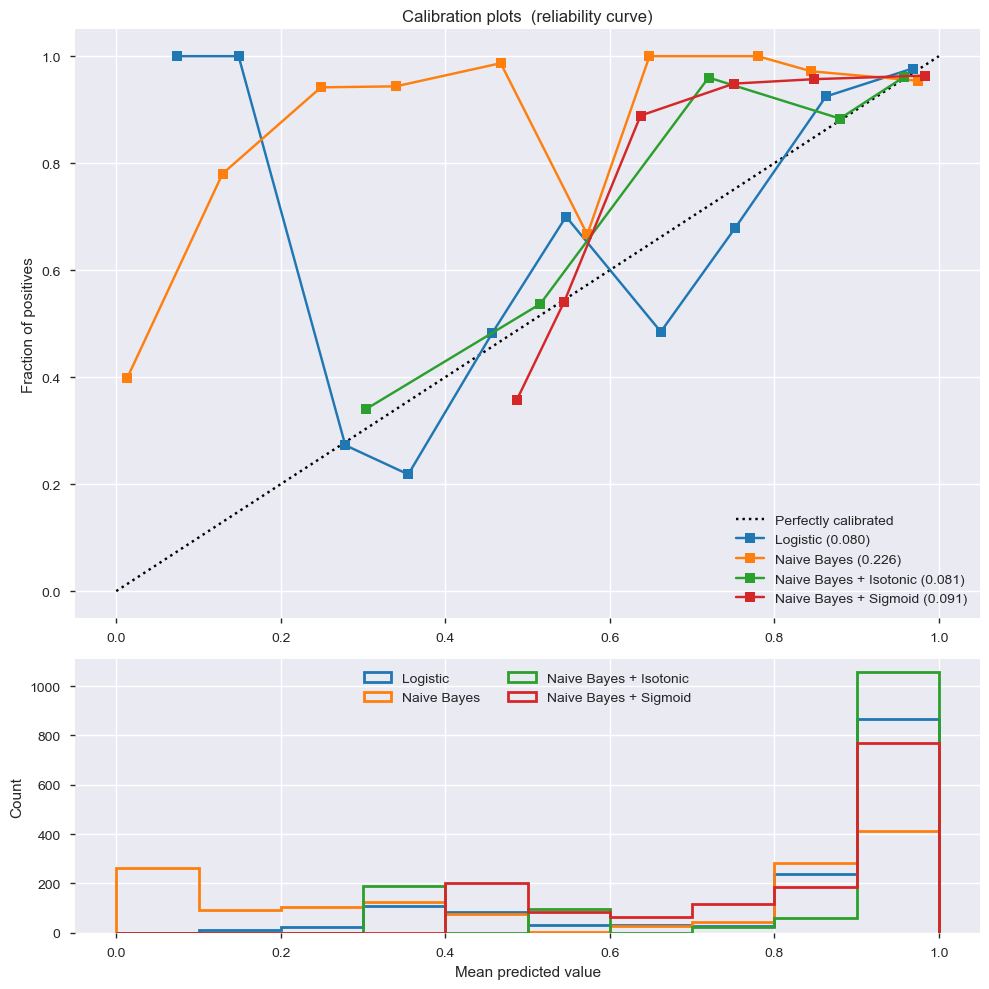

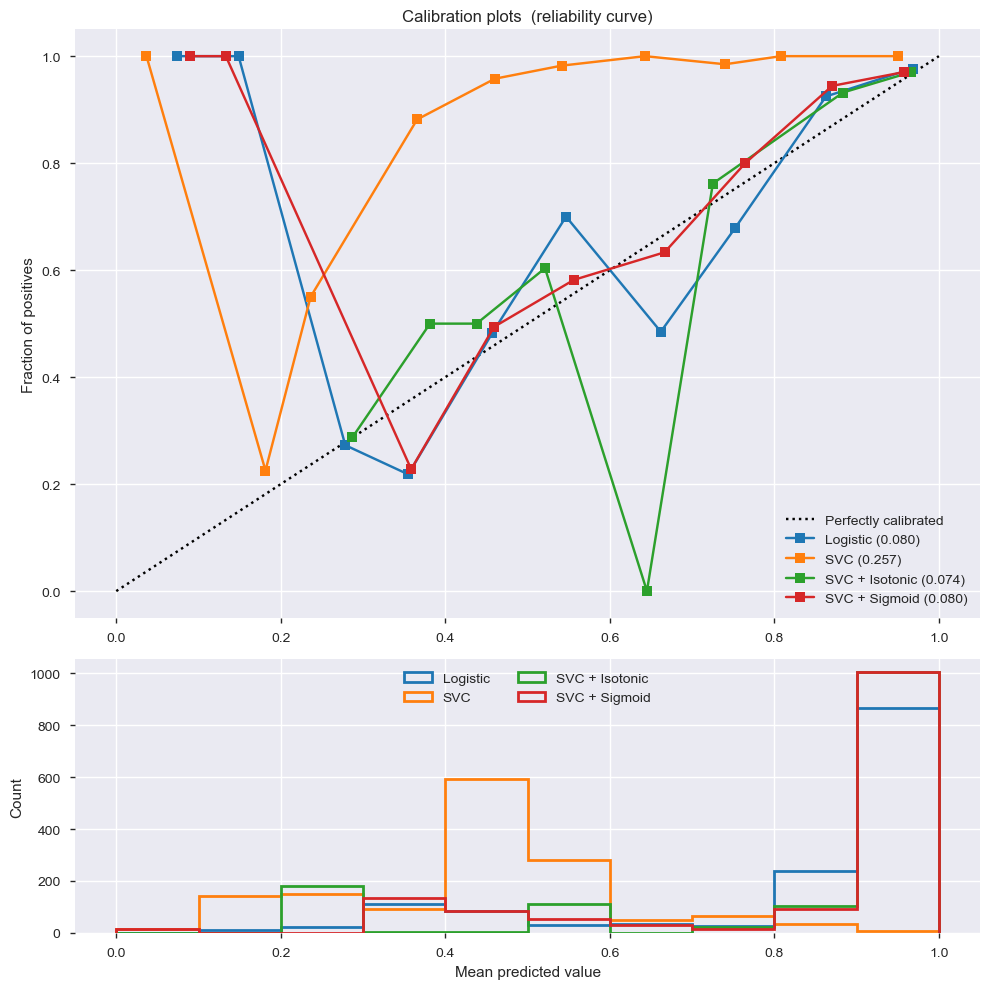

In [ ]:

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(x_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(x_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(max_iter=10000), "SVC", 2)

plt.show()

In [ ]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
voting = VotingClassifier(
   [('logreg', LogisticRegression(C=100)),
    ('tree', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=3))],
    voting='soft')
voting.fit(x_train, y_train)
lr, tree, knn = voting.estimators_
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [ ]:
from sklearn.pipeline import make_pipeline
stacking = make_pipeline(voting, LogisticRegression(C=100))
stacking.fit(x_train, y_train)
print(stacking.score(x_train, y_train))
print(stacking.score(x_test, y_test))

0.9099840162176913
0.9081346423562412


In [ ]:
stacking.named_steps.logisticregression.coef_

array([[-0.73007162,  0.78583219, -2.35217891,  2.40793947, -0.25637334,
         0.3121339 ]])

In [ ]:
from sklearn.model_selection import cross_val_predict
# take only probabilities of positive classes for more interpretable coefficients
first_stage = make_pipeline(voting, FunctionTransformer(lambda X: X[:, 1::2]))
transform_cv = cross_val_predict(first_stage, x_train, y_train, cv=10, method="transform")
second_stage = LogisticRegression(C=100).fit(transform_cv, y_train)
print(second_stage.coef_)

[[1.78132719 4.76344375 0.19530667]]


In [ ]:
print(second_stage.score(transform_cv, y_train))
print(second_stage.score(first_stage.transform(x_test), y_test))

0.9093602588593037
0.9081346423562412


In [ ]:
#Using subsample of covertype dataset
from sklearn.linear_model import LogisticRegressionCV
print(x_train.shape)
print(np.bincount(y_train))
lr = LogisticRegressionCV().fit(x_train, y_train)

(25651, 8)
[ 4162 21489]


In [ ]:
print(lr.predict_proba(x_test)[:10])
print(y_test[:10])

[[0.06172669 0.93827331]
 [0.46955904 0.53044096]
 [0.05989484 0.94010516]
 [0.17832332 0.82167668]
 [0.53795258 0.46204742]
 [0.02724739 0.97275261]
 [0.00813299 0.99186701]
 [0.05989484 0.94010516]
 [0.04620244 0.95379756]
 [0.13909429 0.86090571]]
4043     1
23348    1
7498     1
14317    1
12372    1
7032     1
21146    1
12287    1
26024    1
17035    0
Name: Registration Status1, dtype: int64


### Calibration

In [ ]:
probs = lr.predict_proba(x_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)
print(prob_true)
print(prob_pred)

[1.         0.31034483 0.42622951 0.57142857 0.96296296]
[0.13551856 0.35676215 0.48840358 0.71099098 0.9268616 ]


### Feature Importance

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances

,importance
feature,
Sector1,0.700
TAXTYPE1,0.157
Description,0.081
STATUS,0.026
Scale1,0.014
Place1,0.010
Department1,0.010
Level of Income1,0.003


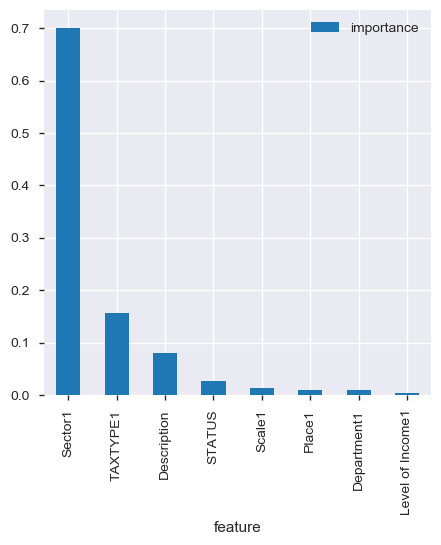

In [ ]:
importances.plot.bar()

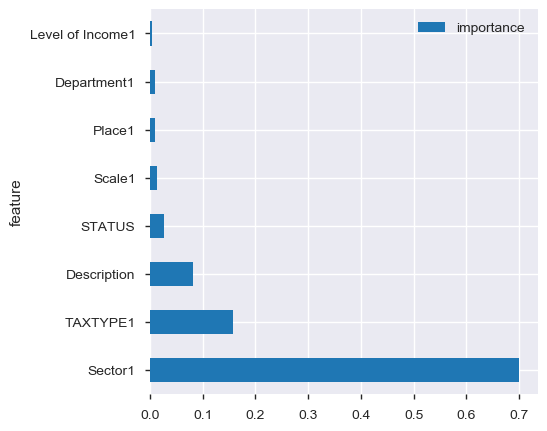

In [ ]:
importances.plot.barh()

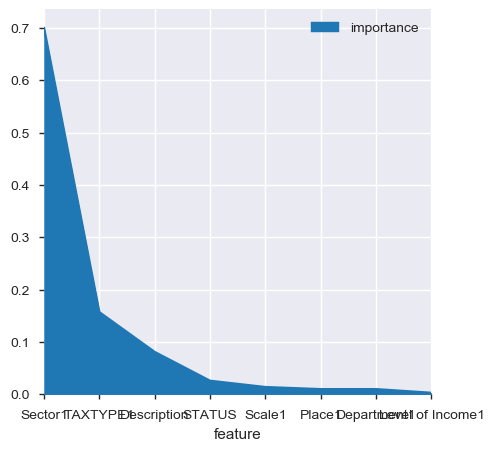

In [ ]:
importances.plot.area()

Level of Income1  play less significant role in our random forest classifiers prediction process. Because of that we can drop it from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model

## ROC_AUC 

### Logistic regression

0.7985363159348247
Score: [0.88082538 0.88863977 0.86212332 0.87507201 0.88361698 0.90692224
 0.87796743 0.86284097 0.87979702 0.87877483]
AUC 0.879657993935302 + 0.012066539372152275


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa33408c88>)

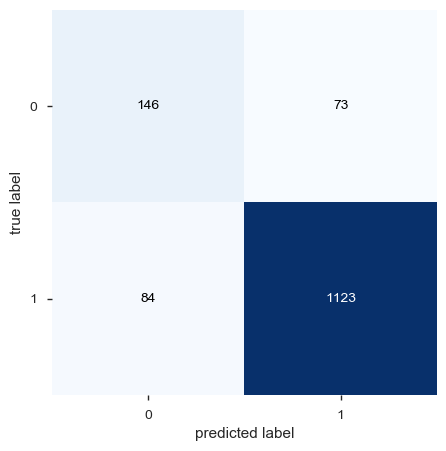

In [ ]:
lg=LogisticRegression(solver='liblinear')
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print(roc_auc_score(y_test,y_pred))
score=cross_val_score(linear_model.LinearRegression(),
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
plot_confusion_matrix(confusion_matrix(y_test, y_pred))


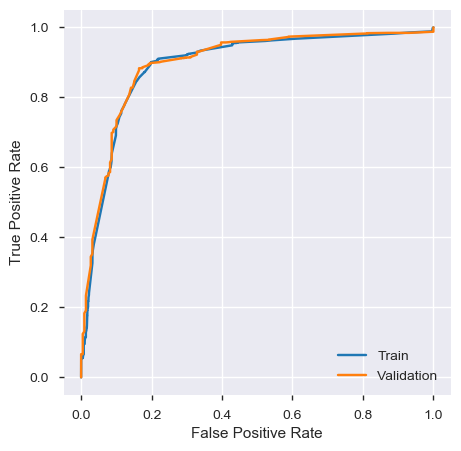

Area Under the Curve for logistic regression:  0.8972564908656884


In [ ]:
probas_train = lg.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])

# Testing Set
probas_ = lg.predict_proba(x_test)
fpr_lg, tpr_lg, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_lg = auc(fpr_lg, tpr_lg)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_lg, tpr_lg, label = 'Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Area Under the Curve for logistic regression: ', roc_auc_lg)

0.8624632565740941
Score: [0.93056165 0.93092487 0.91689672 0.93017437 0.92777332 0.93229633
 0.92779233 0.91761821 0.92164233 0.92236685]
AUC 0.9258046978555058 + 0.005416833063838861


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa33238b08>)

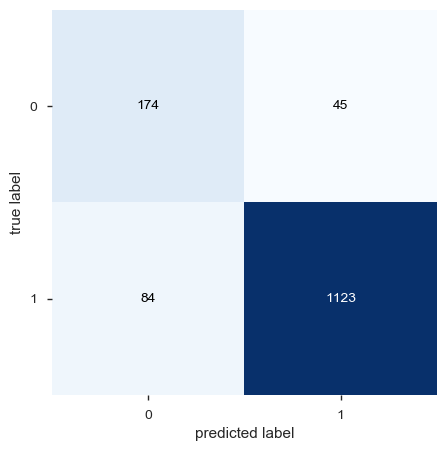

In [ ]:
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print(roc_auc_score(y_test,y_pred))
score=cross_val_score(xgb,
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

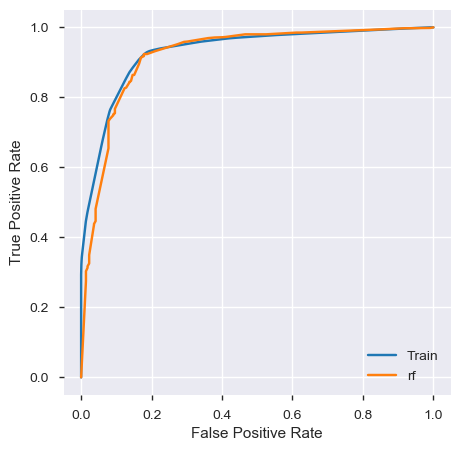

Area Under the Curve for Decision tree:  0.9201329383769714


In [ ]:
probas_train = DT.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])

# Testing Set
probas_ = DT.predict_proba(x_test)
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_DT = auc(fpr_DT, tpr_DT)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_DT, tpr_DT, label = 'DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Area Under the Curve for Decision tree: ', roc_auc_DT)

### Random forest

0.860594401758388
Score: [0.93056165 0.93092487 0.91689672 0.93017437 0.92777332 0.93229633
 0.92779233 0.91761821 0.92164233 0.92236685]
AUC 0.9258046978555058 + 0.005416833063838861


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa2909a4c8>)

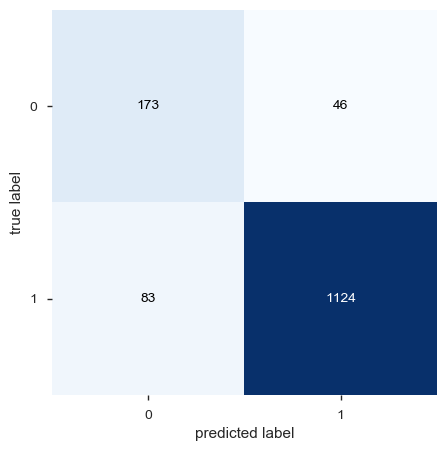

In [ ]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(roc_auc_score(y_test,y_pred))
score=cross_val_score(xgb,
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

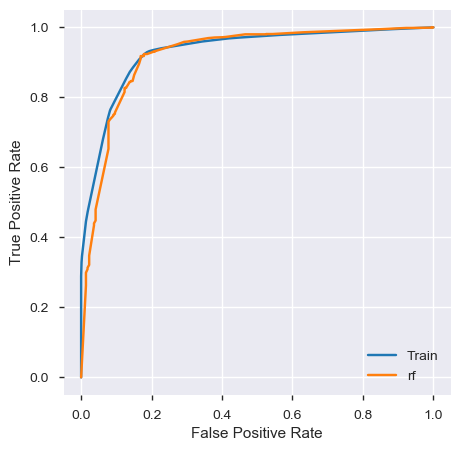

Area Under the Curve for Random forest:  0.9197867840943054


In [ ]:
probas_train = rf.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])

# Testing Set
probas_ = rf.predict_proba(x_test)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_rf, tpr_rf, label = 'rf')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Area Under the Curve for Random forest: ', roc_auc_rf)


### XGB

0.8593516511370128
Score: [0.93056165 0.93092487 0.91689672 0.93017437 0.92777332 0.93229633
 0.92779233 0.91761821 0.92164233 0.92236685]
AUC 0.9258046978555058 + 0.005416833063838861


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa315a9f88>)

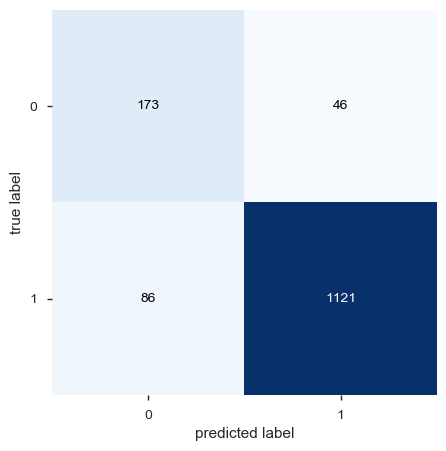

In [ ]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(roc_auc_score(y_test,y_pred))
score=cross_val_score(xgb,
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

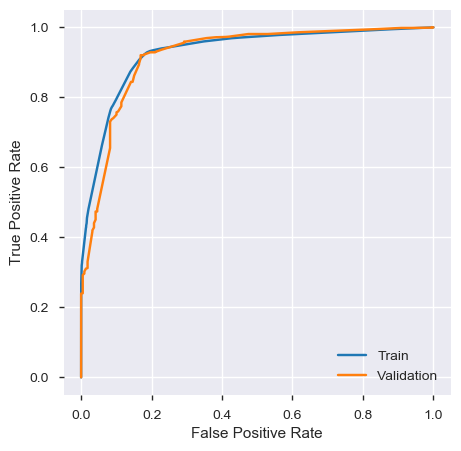

Area Under the Curve for GB:  0.9204961166407524


In [ ]:
probas_train = xgb.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])

# Testing Set
probas_ = xgb.predict_proba(x_test)
fpr_XGB, tpr_XGB, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_XGB, tpr_XGB, label = 'Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Area Under the Curve for GB: ', roc_auc_XGB)

### GB

0.860180151551263
Score: [0.93097007 0.93025756 0.91760535 0.93103512 0.92721906 0.9336515
 0.92847747 0.91766855 0.92161381 0.92279491]
AUC 0.9261293383890656 + 0.005509786145301206


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa29618e08>)

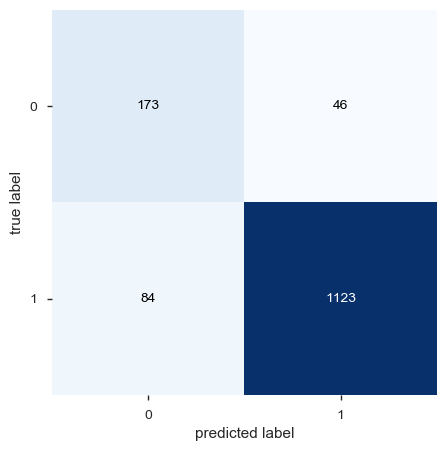

In [ ]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(roc_auc_score(y_test,y_pred))
score=cross_val_score(GradientBoostingClassifier(),
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

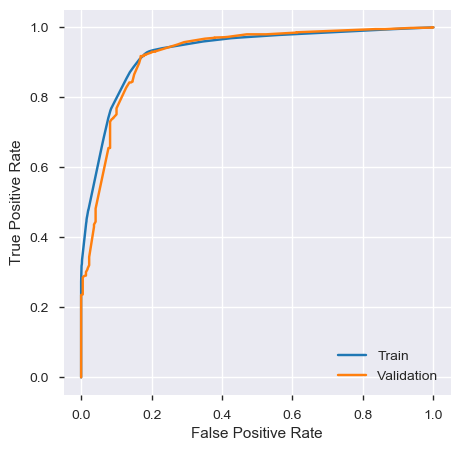

Area Under the Curve for GB:  0.9212716535582012


In [ ]:
probas_train = gb.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train[:, 1])

# Testing Set
probas_ = gb.predict_proba(x_test)
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_GB = auc(fpr_GB, tpr_GB)

train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_GB, tpr_GB, label = 'Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Area Under the Curve for GB: ', roc_auc_GB)

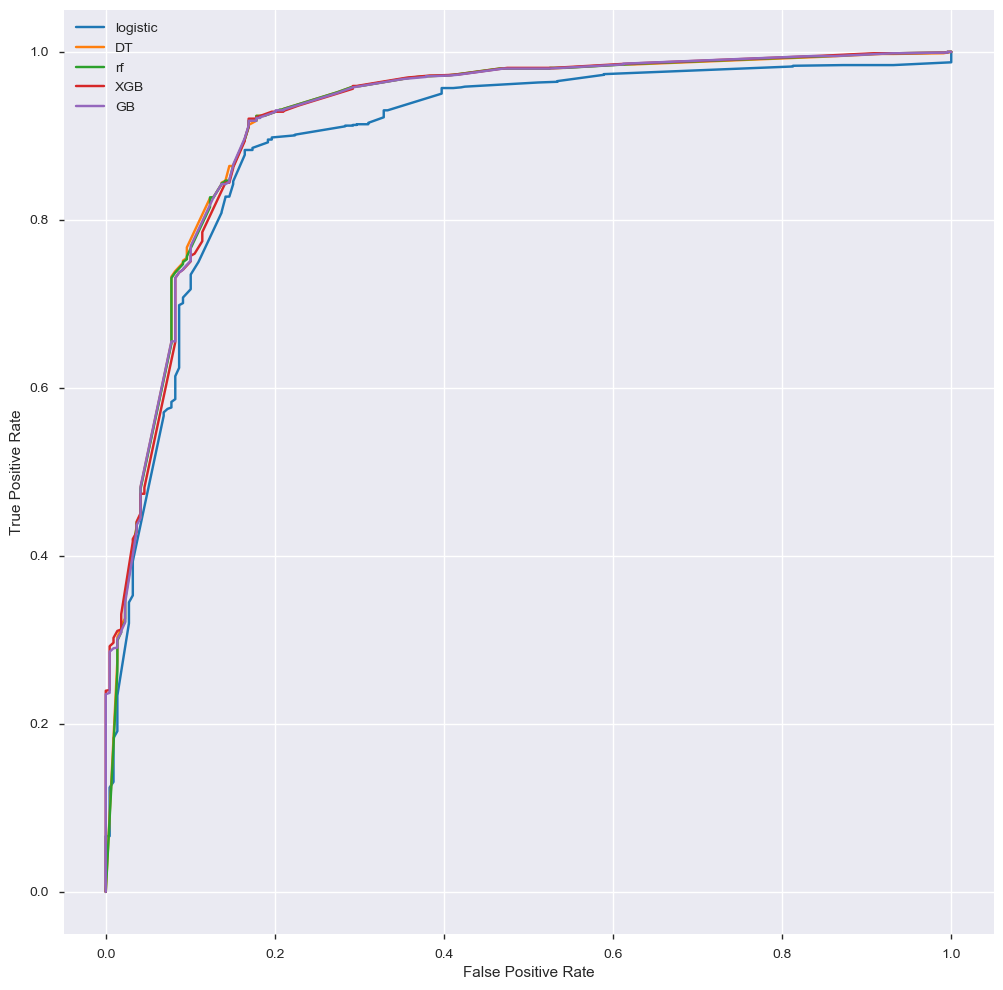

Area Under the Curve for logistic regression:  0.8972564908656884
Area Under the Curve for Decision tree:  0.9201329383769714
Area Under the Curve for Random forest:  0.9197867840943054
Area Under the Curve for XGBoost:  0.9204961166407524
Area Under the Curve for Gradient Boost:  0.9212716535582012


In [ ]:
plt.figure(figsize=(12,12))
test, = plt.plot(fpr_lg, tpr_lg, label = 'logistic')
test, = plt.plot(fpr_DT, tpr_DT, label = 'DT')
test, = plt.plot(fpr_rf, tpr_rf, label = 'rf')
test, = plt.plot(fpr_XGB, tpr_XGB, label = 'XGB')
test, = plt.plot(fpr_GB, tpr_GB, label = 'GB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Area Under the Curve for logistic regression: ', roc_auc_lg)
print('Area Under the Curve for Decision tree: ', roc_auc_DT)
print('Area Under the Curve for Random forest: ', roc_auc_rf)
print('Area Under the Curve for XGBoost: ', roc_auc_XGB)
print('Area Under the Curve for Gradient Boost: ', roc_auc_GB)